In [1]:
import sqlite3
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


In [2]:
data = pd.read_csv('C:\Acadgild Desk\soccer_data.csv')
data.head()

,Unnamed: 0,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [3]:
#print column names in readable format
[(f"column (i+1) : {column}") for i ,column in enumerate(data.columns)]

['column (i+1) : Unnamed: 0',
 'column (i+1) : id',
 'column (i+1) : player_fifa_api_id',
 'column (i+1) : player_api_id',
 'column (i+1) : date',
 'column (i+1) : overall_rating',
 'column (i+1) : potential',
 'column (i+1) : preferred_foot',
 'column (i+1) : attacking_work_rate',
 'column (i+1) : defensive_work_rate',
 'column (i+1) : crossing',
 'column (i+1) : finishing',
 'column (i+1) : heading_accuracy',
 'column (i+1) : short_passing',
 'column (i+1) : volleys',
 'column (i+1) : dribbling',
 'column (i+1) : curve',
 'column (i+1) : free_kick_accuracy',
 'column (i+1) : long_passing',
 'column (i+1) : ball_control',
 'column (i+1) : acceleration',
 'column (i+1) : sprint_speed',
 'column (i+1) : agility',
 'column (i+1) : reactions',
 'column (i+1) : balance',
 'column (i+1) : shot_power',
 'column (i+1) : jumping',
 'column (i+1) : stamina',
 'column (i+1) : strength',
 'column (i+1) : long_shots',
 'column (i+1) : aggression',
 'column (i+1) : interceptions',
 'column (i+1) : 

In [4]:
soccer_data =data.drop(["id", "player_fifa_api_id", "player_api_id", "date"],axis = 1)
soccer_data.duplicated().any()
                

False

In [5]:
soccer_data.drop_duplicates(inplace = True)

In [6]:
soccer_data.shape

(183978, 39)

In [7]:
soccer_data.isnull().values.sum()

47301

In [8]:
## handling missing data

def data_preprocessing(data):
    data.convert_objects(convert_numeric=True)
    data.fillna(-99999,inplace=True)
    return data

data_preprocessing(soccer_data)
soccer_data.isnull().values.sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


0

In [9]:
soccer_data.dtypes

Unnamed: 0               int64
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision                 float64
penalties              float64
marking                float64
standing

In [10]:
soccer_data = pd.get_dummies(soccer_data) ## will work on catogorial varibales
soccer_data.head(10)
                        

,Unnamed: 0,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,defensive_work_rate_9,defensive_work_rate__0,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,...,0,0,0,0,0,0,1,0,0,0
1,1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,...,0,0,0,0,0,0,1,0,0,0
2,2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,...,0,0,0,0,0,0,1,0,0,0
3,3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,...,0,0,0,0,0,0,1,0,0,0
4,4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,...,0,0,0,0,0,0,1,0,0,0
5,5,74.0,76.0,80.0,53.0,58.0,71.0,40.0,73.0,70.0,...,0,0,0,0,0,0,1,0,0,0
6,6,74.0,76.0,80.0,53.0,58.0,71.0,32.0,73.0,70.0,...,0,0,0,0,0,0,1,0,0,0
7,7,73.0,75.0,79.0,52.0,57.0,70.0,29.0,71.0,68.0,...,0,0,0,0,0,0,1,0,0,0
8,8,73.0,75.0,79.0,51.0,57.0,70.0,29.0,71.0,68.0,...,0,0,0,0,0,0,1,0,0,0
9,9,73.0,75.0,79.0,51.0,57.0,70.0,29.0,71.0,68.0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
soccer_data.shape
print(f"shape of the DataFrame after one hot encoding is : {soccer_data.shape}")

shape of the DataFrame after one hot encoding is : (183978, 68)


In [12]:
soccer_data.columns

Index(['Unnamed: 0', 'overall_rating', 'potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'preferred_foot_-99999',
       'preferred_foot_left', 'preferred_foot_right',
       'attacking_work_rate_-99999', 'attacking_work_rate_None',
       'attacking_work_rate_high', 'attacking_work_rate_le',
       'attacking_work_rate_low', 'attacking_work_rate_medium',
       'attacking_work_rate_norm', 'attacking_work_rate_stoc',
       'attacking_work_rate_y', 'defensive_work_rate_-99999',
       'defensive_work_rate_0', 'de

In [13]:
soccer_data.describe()

,Unnamed: 0,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,defensive_work_rate_9,defensive_work_rate__0,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
count,183978.00000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,...,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000
mean,91988.50000,-386.109317,-381.271065,-399.561045,-404.703378,-397.391808,-392.251622,-1425.879132,-395.491352,-1422.433465,...,0.000826,0.013012,0.000565,0.000576,0.146980,0.100186,0.711205,0.008425,0.001892,0.000484
std,53110.01825,6730.171365,6730.497800,6729.280845,6728.938235,6729.425526,6729.767605,12059.466531,6729.557107,12059.888073,...,0.028732,0.113328,0.023769,0.023996,0.354086,0.300249,0.453204,0.091400,0.043451,0.021989
min,0.00000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45994.25000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,34.000000,51.000000,40.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91988.50000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,55.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,137982.75000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,183977.00000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
## visualising the targret varibale -  Overall rating
soccer_data['overall_rating'].value_counts()


 68.0       10492
 69.0       10281
 67.0       10198
 66.0       10112
 70.0       10028
 72.0        9740
 71.0        9354
 65.0        9336
 73.0        9044
 64.0        9030
 74.0        8556
 63.0        7704
 75.0        7359
 76.0        6150
 62.0        6041
 61.0        5161
 77.0        5104
 60.0        4489
 78.0        4064
 79.0        3461
 59.0        3239
 58.0        2950
 80.0        2773
 57.0        2289
 81.0        2174
 56.0        1798
 82.0        1663
 55.0        1418
 83.0        1166
 54.0        1160
            ...  
 84.0         855
-99999.0      836
 51.0         665
 85.0         604
 50.0         586
 86.0         456
 49.0         295
 87.0         292
 48.0         231
 47.0         152
 88.0         151
 46.0         142
 45.0          92
 89.0          77
 90.0          68
 44.0          50
 43.0          47
 42.0          47
 41.0          41
 40.0          24
 92.0          16
 91.0          16
 94.0          12
 39.0          12
 93.0     

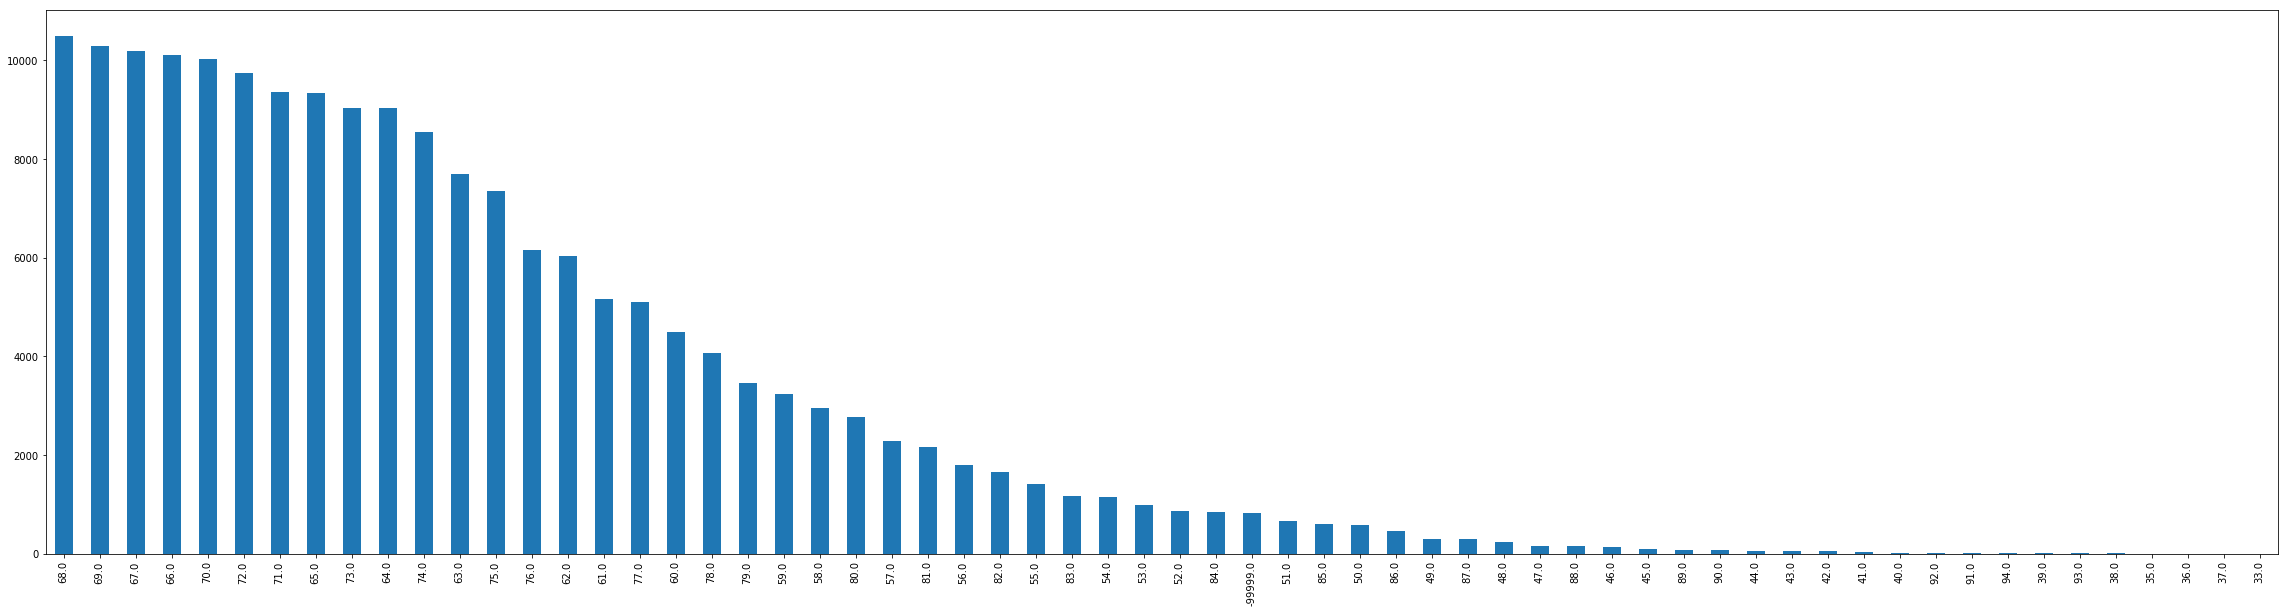

In [15]:
 
soccer_data['overall_rating'].value_counts().plot(kind="bar", figsize=(40,10))


In [16]:
# Split dataframe into df_x and df_y
df_x = soccer_data.drop(['overall_rating'],1)
df_y = np.array(soccer_data['overall_rating'])

In [17]:
# Use Random ForestRegressor to check feature _importance
rfc_1 = RandomForestRegressor(random_state = 10)
rfc_1.fit(df_x,df_y)

feature_importances = pd.DataFrame({'feature':df_x.columns,'importance':np.round(rfc_1.feature_importances_,4)})
feature_importances = feature_importances.sort_values('importance',ascending=False).set_index('feature')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
print(feature_importances[:45])

                            importance
feature                               
gk_positioning                     0.1
gk_kicking                         0.1
shot_power                         0.1
reactions                          0.1
gk_handling                        0.1
gk_diving                          0.1
short_passing                      0.1
finishing                          0.1
crossing                           0.1
long_shots                         0.1
attacking_work_rate_le             0.0
attacking_work_rate_low            0.0
attacking_work_rate_medium         0.0
attacking_work_rate_high           0.0
defensive_work_rate_3              0.0
attacking_work_rate_norm           0.0
attacking_work_rate_stoc           0.0
attacking_work_rate_y              0.0
defensive_work_rate_-99999         0.0
defensive_work_rate_0              0.0
defensive_work_rate_1              0.0
defensive_work_rate_2              0.0
defensive_work_rate_5              0.0
defensive_work_rate_4    

In [19]:
soccer_data.shape

(183978, 68)

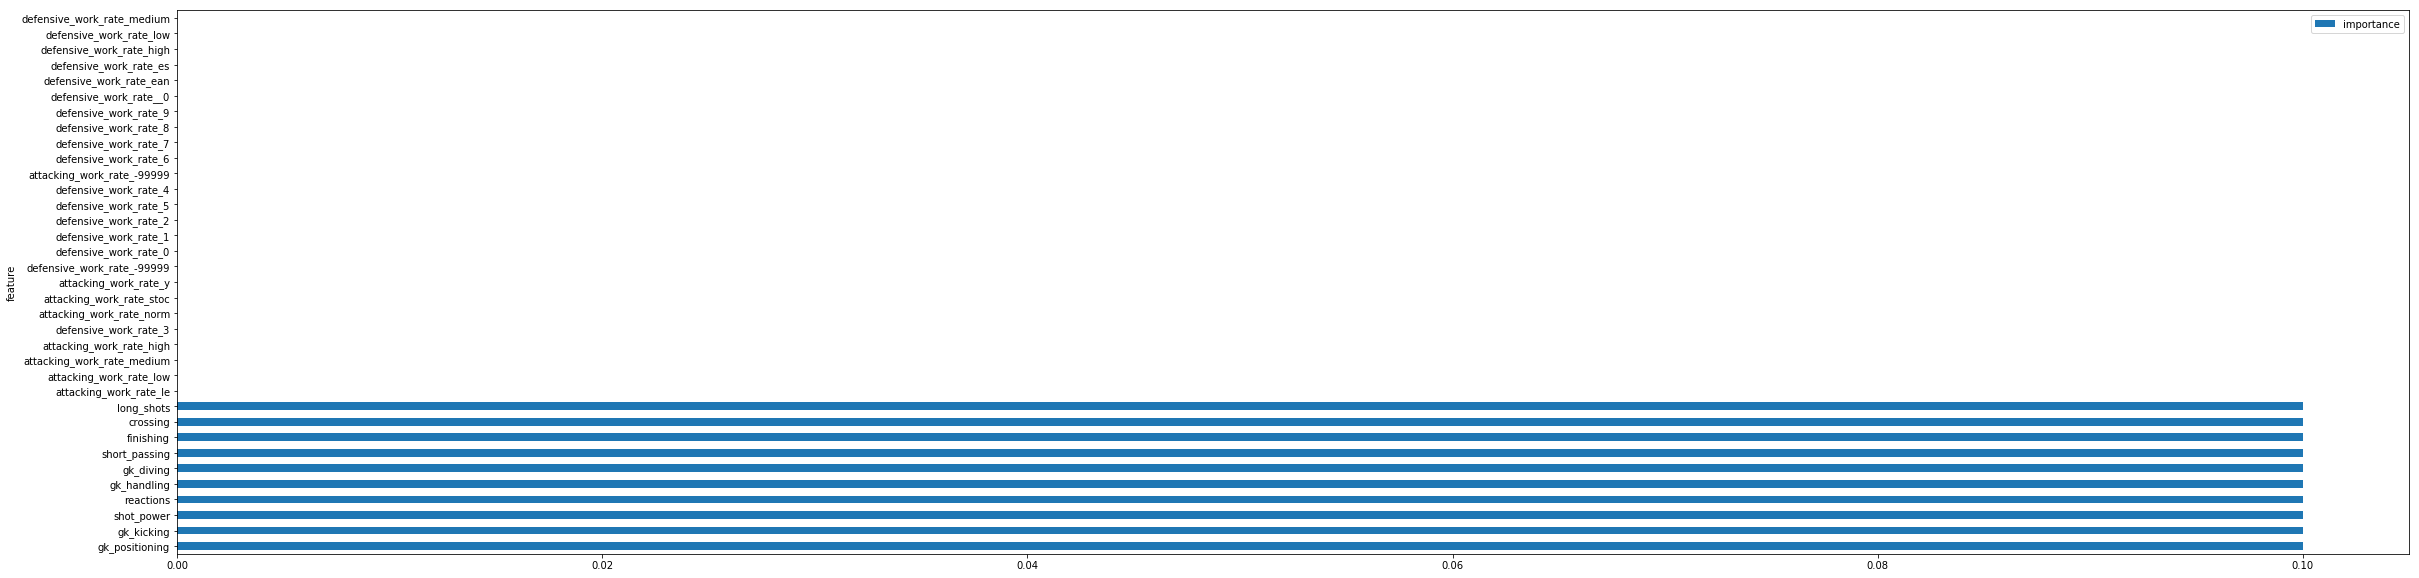

In [20]:
feature_importances[:35].plot(kind = 'barh' ,figsize = (40,10))

In [21]:
soccer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 68 columns):
Unnamed: 0                    183978 non-null int64
overall_rating                183978 non-null float64
potential                     183978 non-null float64
crossing                      183978 non-null float64
finishing                     183978 non-null float64
heading_accuracy              183978 non-null float64
short_passing                 183978 non-null float64
volleys                       183978 non-null float64
dribbling                     183978 non-null float64
curve                         183978 non-null float64
free_kick_accuracy            183978 non-null float64
long_passing                  183978 non-null float64
ball_control                  183978 non-null float64
acceleration                  183978 non-null float64
sprint_speed                  183978 non-null float64
agility                       183978 non-null float64
reactions                  

In [22]:
X = soccer_data['preferred_foot_left'].values.reshape(-1,1)
y = soccer_data['overall_rating'].values.reshape(-1,1)

In [23]:
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))


The linear model is: Y = -532.19 + 600.82X


In [24]:
predictions = reg.predict(X)

In [25]:
predictions

array([[-532.19487235],
       [-532.19487235],
       [-532.19487235],
       ...,
       [-532.19487235],
       [-532.19487235],
       [-532.19487235]])

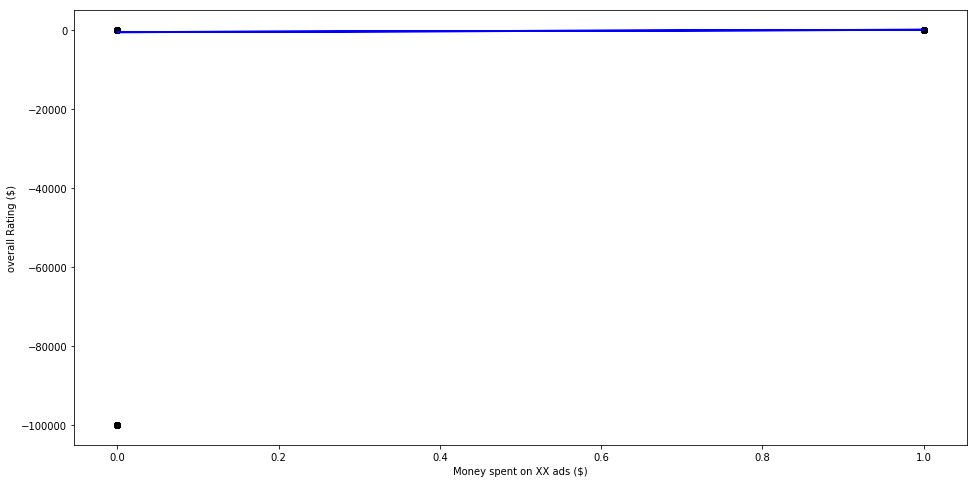

In [26]:
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    soccer_data['preferred_foot_left'],
    soccer_data['overall_rating'],
    c='black'
)
plt.plot(
    soccer_data['preferred_foot_left'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on XX ads ($)")
plt.ylabel("overall Rating ($)")
plt.show()


In [27]:
# create training and testing vars
##X_train, X_test, y_train, y_test = train_test_split(soccer_data.preferred_foot_left, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(147182, 1) (147182, 1)
(36796, 1) (36796, 1)


In [28]:
reg = LinearRegression()
reg.fit(X_train.reshape(-1,1),y_train)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))


The linear model is: Y = -514.47 + 583.11X


In [29]:
## Alternate option
x, x_test, y, y_test = train_test_split(df_x,df_y,test_size=0.2,train_size=0.8, random_state = 55)
##x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.20,train_size =0.80, random_state = 55)


In [33]:
## Apply Model

lr=LinearRegression()
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)
##print(lr.score(x_train,y_test_pred)
print(lr.score(X_test,y_test_pred))
##rmse(y_test,y_test_pred)
sqrt(mean_squared_error(y_test,y_test_pred))

1.0


6907.431175010082